In [17]:
import pandas as pd 
import pickle 
import numpy as np
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv("train.csv")

In [3]:
df.head(3)

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1


In [4]:
del df['id']
del df['f_27']

In [5]:
newdf = df[["f_26","f_24","f_22","f_19","f_21","f_25","target"]]

In [6]:
newdf.head()

,f_26,f_24,f_22,f_19,f_21,f_25,target
0,1.363402,-2.730628,-2.540739,0.298218,3.058541,-0.208177,0
1,-0.058316,-1.217077,2.278315,-3.147667,2.179050,-3.782194,1
2,-3.703488,-0.009121,-1.385775,2.820733,-0.784235,2.788536,1
3,-0.608601,1.686035,0.572594,1.081084,-2.343819,-2.533098,1
4,4.371371,2.127649,-3.912929,-0.126179,1.133665,-3.306784,1


In [7]:
XTT = newdf.drop(columns=['target'])
yTT = newdf['target']
X_train, X_test, y_train, y_test = train_test_split(XTT, yTT, test_size=0.2)

In [8]:
modelKNN = KNeighborsClassifier(n_neighbors=10)
resultKNN = modelKNN.fit(X_train, y_train)
prediction_test = modelKNN.predict(X_test)
accuracyKNN = metrics.accuracy_score(y_test, prediction_test)
print("Model Accuracy (KNN):" "\n", accuracyKNN)

Model Accuracy (KNN):
 0.6512222222222223


In [9]:
dftest = pd.read_csv("test.csv")

In [10]:
dftest.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
0,900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,...,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,BAAABADLAC,99.478419,0,0
1,900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,...,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,AFABBAEGCB,-65.993825,1,0
2,900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,...,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,BBACABBKEE,-87.405622,0,1
3,900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,...,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,AEBEAACQCC,-281.293460,0,0
4,900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,...,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,AEBBBBDABF,25.629415,0,2


In [11]:
newtest = dftest[['f_26', 'f_21', 'f_25', 'f_24', 'f_19', 'f_22']]
newtest.head()

,f_26,f_21,f_25,f_24,f_19,f_22
0,5.734205,-1.006400,-1.966887,-2.427430,-1.128371,-1.193879
1,3.194219,2.382405,-0.725155,-2.848714,-4.424098,0.149442
2,0.066898,-7.026098,0.585032,1.714005,-1.523864,1.312277
3,3.893099,-0.594532,-1.003320,-2.364007,-1.404597,-3.939475
4,1.861884,0.084906,1.210687,-3.557893,-1.968516,-0.985736


In [12]:
mustiCSV = dftest[['id']]

In [13]:
mustiCSV

,id
0,900000
1,900001
2,900002
3,900003
4,900004
...,...
699995,1599995
699996,1599996
699997,1599997
699998,1599998


In [14]:
predictionOnTest = modelKNN.predict(newtest)

In [15]:
predictionOnTest
mustiCSV['target'] = predictionOnTest
mustiCSV

,id,target
0,900000,1
1,900001,0
2,900002,0
3,900003,1
4,900004,0
...,...,...
699995,1599995,1
699996,1599996,1
699997,1599997,0
699998,1599998,0


In [16]:
mustiCSV.to_csv('musticsv.csv', index=False)

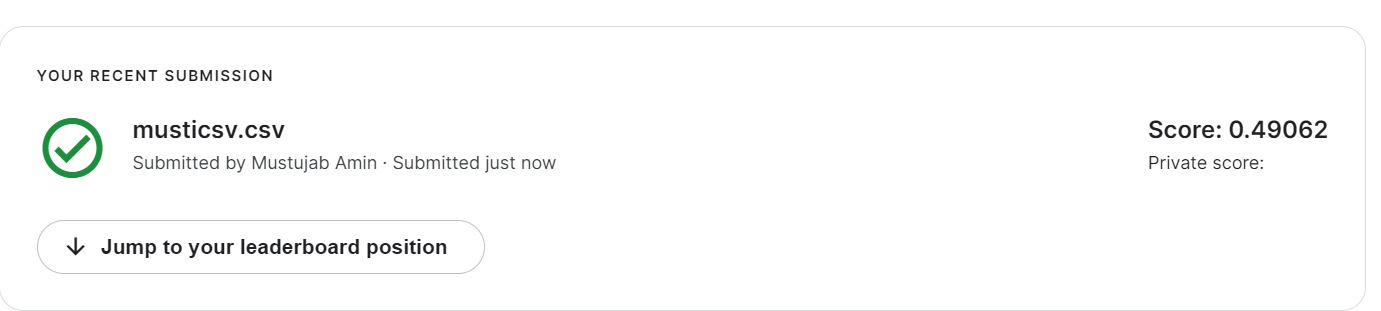# 